In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import requests
from zipfile import ZipFile
from pathlib import Path
import os

In [3]:
data_path = Path("/content/drive/MyDrive/custom_dataset")
image_path = data_path / "pizza_sushi_steak"

In [4]:
if image_path.is_dir():
  print("Image path exists")
else:
  image_path.mkdir(parents=True,exist_ok=True)

  with open(data_path/"pizza_sushi_steak.zip", "wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
    f.write(request.content)

    with ZipFile(data_path/"pizza_sushi_steak.zip", "r") as f:
      f.extractall(image_path)

Image path exists


In [5]:
for dirpath,dirname,filenames in os.walk(image_path):
  print(f"Dir {dirpath} has {len(dirname)} dirs & {len(filenames)} files")

Dir /content/drive/MyDrive/custom_dataset/pizza_sushi_steak has 2 dirs & 0 files
Dir /content/drive/MyDrive/custom_dataset/pizza_sushi_steak/test has 3 dirs & 0 files
Dir /content/drive/MyDrive/custom_dataset/pizza_sushi_steak/test/pizza has 0 dirs & 25 files
Dir /content/drive/MyDrive/custom_dataset/pizza_sushi_steak/test/steak has 0 dirs & 19 files
Dir /content/drive/MyDrive/custom_dataset/pizza_sushi_steak/test/sushi has 0 dirs & 31 files
Dir /content/drive/MyDrive/custom_dataset/pizza_sushi_steak/train has 3 dirs & 0 files
Dir /content/drive/MyDrive/custom_dataset/pizza_sushi_steak/train/pizza has 0 dirs & 78 files
Dir /content/drive/MyDrive/custom_dataset/pizza_sushi_steak/train/steak has 0 dirs & 75 files
Dir /content/drive/MyDrive/custom_dataset/pizza_sushi_steak/train/sushi has 0 dirs & 72 files


In [6]:
train_dir = image_path / "train"
test_dir = image_path / "test"


512 382
sushi


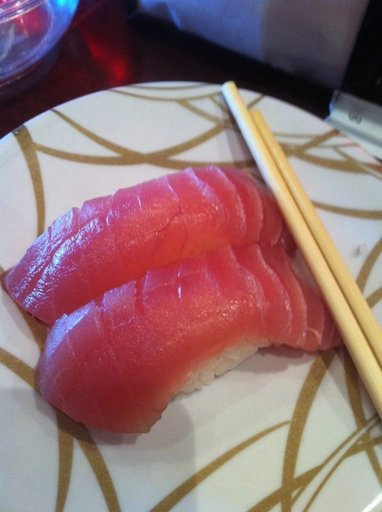

In [7]:
import random
from PIL import Image

image_list = list(image_path.glob("*/*/*.jpg"))

random_img = random.choice(image_list)

random_img_class = random_img.parent.stem

img = Image.open(random_img)
print(img.height,img.width)
print(random_img_class)
img


(512, 382, 3)


(-0.5, 381.5, 511.5, -0.5)

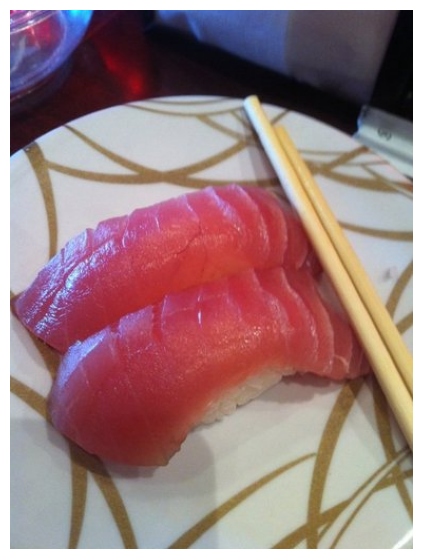

In [8]:
import numpy as np
import matplotlib.pyplot as plt

img_numpy = np.asarray(img)
plt.figure(figsize=(10, 7))
plt.imshow(img_numpy)
print(img_numpy.shape)
plt.axis(False)

In [9]:
img_numpy.shape

(512, 382, 3)

In [10]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets,transforms

In [11]:
data_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()])

In [12]:
train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform,
                                  target_transform=None)
test_data = datasets.ImageFolder(root=test_dir,
                                 transform = data_transform)

In [13]:
train_data

Dataset ImageFolder
    Number of datapoints: 225
    Root location: /content/drive/MyDrive/custom_dataset/pizza_sushi_steak/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
               ToTensor()
           )

In [14]:
len(train_data),len(test_data)

(225, 75)

In [15]:
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [16]:
img, label = train_data[0]
img, label

(tensor([[[0.1882, 0.1961, 0.2000,  ..., 0.1647, 0.1686, 0.1882],
          [0.2039, 0.2039, 0.2039,  ..., 0.1647, 0.1647, 0.1765],
          [0.2118, 0.2118, 0.2118,  ..., 0.1569, 0.1647, 0.1686],
          ...,
          [0.2392, 0.2353, 0.2392,  ..., 0.2000, 0.1804, 0.1804],
          [0.2392, 0.2353, 0.2392,  ..., 0.1804, 0.1569, 0.1529],
          [0.2353, 0.2353, 0.2392,  ..., 0.1647, 0.1451, 0.1451]],
 
         [[0.1373, 0.1373, 0.1373,  ..., 0.1765, 0.1647, 0.1765],
          [0.1490, 0.1490, 0.1490,  ..., 0.1765, 0.1647, 0.1765],
          [0.1647, 0.1647, 0.1647,  ..., 0.1765, 0.1765, 0.1647],
          ...,
          [0.3490, 0.3490, 0.3647,  ..., 0.2706, 0.2667, 0.2549],
          [0.3412, 0.3490, 0.3647,  ..., 0.2549, 0.2471, 0.2353],
          [0.3373, 0.3451, 0.3529,  ..., 0.2431, 0.2314, 0.2235]],
 
         [[0.1059, 0.1059, 0.0902,  ..., 0.3255, 0.3255, 0.3373],
          [0.1059, 0.0902, 0.1059,  ..., 0.3255, 0.3176, 0.3255],
          [0.1059, 0.0902, 0.0902,  ...,

In [17]:
img.shape

torch.Size([3, 64, 64])

(-0.5, 63.5, 63.5, -0.5)

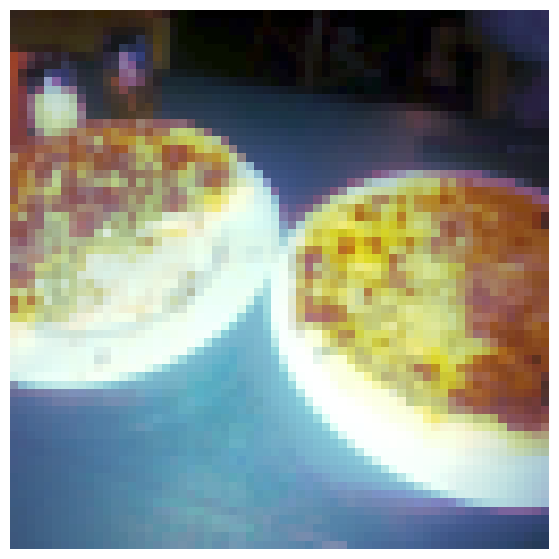

In [18]:
img_permute = img.permute(1,2,0)
plt.figure(figsize=(10,7))
plt.imshow(img_permute)
plt.axis(False)

In [19]:
train_dataloader = DataLoader(train_data,
                              batch_size=16,
                              shuffle=True)
test_dataloader = DataLoader(test_data,
                              batch_size=16,
                              shuffle=True)

In [20]:
import torch.nn as nn

In [21]:
class CustomModel(nn.Module):
  def __init__(self,in_channels=3,hidden_layers=10,out_channels=3):
    super().__init__()
    self.convLayer1 = nn.Sequential(
        nn.Conv2d(in_channels=in_channels,
                  out_channels=hidden_layers,
                  kernel_size=3,
                  padding=1,
                  stride=1),
        nn.ReLU(),

        nn.Conv2d(in_channels=hidden_layers,
                  out_channels=hidden_layers,
                  stride=1,
                  kernel_size=3,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.convLayer2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_layers,
                  out_channels=hidden_layers,
                  kernel_size=3,
                  padding=1,
                  stride=1),
        nn.ReLU(),

        nn.Conv2d(in_channels=hidden_layers,
                  out_channels=hidden_layers,
                  stride=1,
                  kernel_size=3,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_layers*16*16,
                  out_features=out_channels)
    )

  def forward(self,X):
    X = self.convLayer1(X)
    X = self.convLayer2(X)
    X = self.classifier(X)

    return X

In [22]:
model = CustomModel(3,10,3)

In [23]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(),lr=0.001)


In [24]:
model(img.unsqueeze(dim=0))

tensor([[-0.0103, -0.0479, -0.0366]], grad_fn=<AddmmBackward0>)

In [25]:
from tqdm import tqdm


In [26]:

def train_method(
    model: nn.Module,
    loss_fn: nn.Module,
    optimizer: torch.optim.Optimizer,
    accuracy_fn,
    dataloader: torch.utils.data.DataLoader):

  train_loss,train_acc =0,0
  for batch,(X,Y) in enumerate(dataloader):
    print(f"batch {batch} X:{X.shape} Y:{Y.shape}")

    model.train()

    Y_pred = model(X)

    loss = loss_fn(Y_pred,Y)
    train_loss+=loss.item()

    accuracy = accuracy_fn(Y,Y_pred.argmax(dim=1))
    train_acc+=accuracy

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

  train_loss = train_loss / len(dataloader)
  train_acc = train_acc / len(dataloader)
  return train_loss, train_acc


In [27]:

def test_method(
    model: nn.Module,
    loss_fn: nn.Module,
    accuracy_fn,
    dataloader: torch.utils.data.DataLoader):

  test_loss, test_acc = 0, 0
  with torch.inference_mode():
    for batch,(X,Y) in enumerate(dataloader):
      Y_pred = model(X)

      loss = loss_fn(Y_pred,Y)
      test_loss+=loss.item()

      accuracy = accuracy_fn(Y,Y_pred.argmax(dim=1))
      test_acc+= accuracy

    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc





In [28]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100
    return acc

In [29]:
epochs = 3

train_loss,train_acc =[],[]
test_loss,test_acc =[],[]

for epoch in tqdm(range(epochs)):
  loss,acc = train_method(model,
               loss_fn,
               optimizer,
               accuracy_fn,
               train_dataloader)
  train_loss.append(loss)
  train_acc.append(acc)
  print(f"Train loss: {loss:.5f} | Train accuracy: {acc:.2f}%")

  loss,acc = test_method(model,
               loss_fn,
               accuracy_fn,
               test_dataloader)
  test_loss.append(loss)
  test_acc.append(acc)
  print(f"Test loss: {loss:.5f} | Test accuracy: {acc:.2f}%")


  0%|          | 0/3 [00:00<?, ?it/s]

batch 0 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 1 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 2 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 3 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 4 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 5 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 6 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 7 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 8 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 9 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 10 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 11 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 12 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 13 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 14 X:torch.Size([1, 3, 64, 64]) Y:torch.Size([1])
Train loss: 1.11414 | Train accuracy: 29.58%


 33%|███▎      | 1/3 [01:11<02:23, 71.54s/it]

Test loss: 1.09675 | Test accuracy: 33.52%
batch 0 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 1 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 2 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 3 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 4 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 5 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 6 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 7 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 8 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 9 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 10 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 11 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 12 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 13 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 14 X:torch.Size([1, 3, 64, 64]) Y:torch.Size([1])
Train loss: 1.10304 | Train accuracy: 32.92%


 67%|██████▋   | 2/3 [01:18<00:33, 33.73s/it]

Test loss: 1.10359 | Test accuracy: 24.32%
batch 0 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 1 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 2 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 3 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 4 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 5 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 6 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 7 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 8 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 9 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 10 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 11 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 12 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 13 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 14 X:torch.Size([1, 3, 64, 64]) Y:torch.Size([1])
Train loss: 1.09341 | Train accuracy: 45.00%


100%|██████████| 3/3 [01:23<00:00, 27.98s/it]

Test loss: 1.09784 | Test accuracy: 44.20%


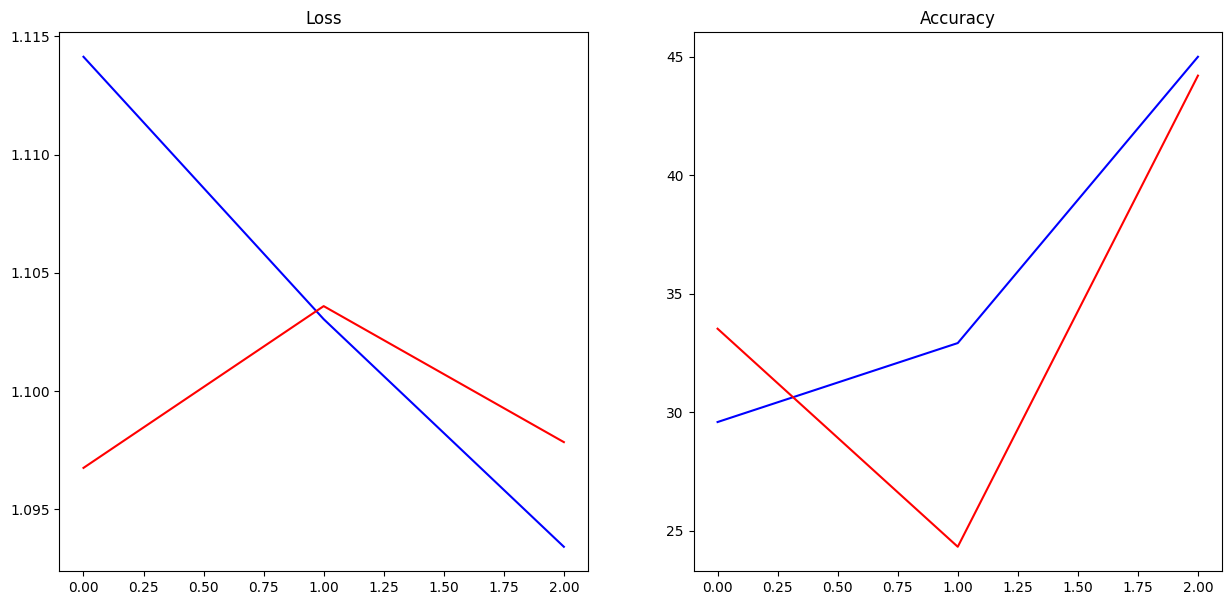

In [30]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.title("Loss")
plt.plot(range(3),train_loss,color="b")
plt.plot(range(3),test_loss,color="r")

plt.subplot(1,2,2)
plt.title("Accuracy")
plt.plot(range(3),train_acc,color="b")
plt.plot(range(3),test_acc,color="r")

In [31]:
class CustomModel1(nn.Module):
  def __init__(self,in_channels=3,hidden_layers=32,out_channels=3):
    super().__init__()
    self.convLayer1 = nn.Sequential(
        nn.Conv2d(in_channels=in_channels,
                  out_channels=32,
                  kernel_size=3,
                  padding=1,
                  stride=1),
        nn.Sigmoid(),

        nn.Conv2d(in_channels=32,
                  out_channels=64,
                  stride=1,
                  kernel_size=3,
                  padding=1),
        nn.Sigmoid(),
        nn.Dropout(0.2),
        nn.MaxPool2d(kernel_size=2)
    )

    self.convLayer2 = nn.Sequential(
        nn.Conv2d(in_channels=64,
                  out_channels=128,
                  kernel_size=3,
                  padding=1,
                  stride=1),
        nn.Sigmoid(),

        nn.Conv2d(in_channels=128,
                  out_channels=128,
                  stride=1,
                  kernel_size=3,
                  padding=1),
        nn.Sigmoid(),
        nn.Dropout(0.2),
        nn.MaxPool2d(kernel_size=2)
    )

    self.convLayer3 = nn.Sequential(
        nn.Conv2d(in_channels=128,
                  out_channels=128,
                  kernel_size=3,
                  padding=1,
                  stride=1),
        nn.Sigmoid(),

        nn.Conv2d(in_channels=128,
                  out_channels=128,
                  stride=1,
                  kernel_size=3,
                  padding=1),
        nn.Sigmoid(),
        nn.Dropout(0.2),
        nn.MaxPool2d(kernel_size=2)
    )

    self.convLayer4 = nn.Sequential(
        nn.Conv2d(in_channels=128,
                  out_channels=64,
                  kernel_size=3,
                  padding=1,
                  stride=1),
        nn.Sigmoid(),

        nn.Conv2d(in_channels=64,
                  out_channels=32,
                  stride=1,
                  kernel_size=3,
                  padding=1),
        nn.Sigmoid(),
        nn.Dropout(0.2),
        nn.MaxPool2d(kernel_size=2)
    )


    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=32*4*4,
                  out_features=out_channels)
    )

  def forward(self,X):
    X = self.convLayer1(X)
    X = self.convLayer2(X)
    X = self.convLayer3(X)
    X = self.convLayer4(X)
    X = self.classifier(X)

    return X

In [32]:
model1 = CustomModel1(3,32,3)
loss_fn_1 = nn.CrossEntropyLoss()
optimizer_1 = torch.optim.Adam(params=model1.parameters(),lr=0.01)

In [33]:
epochs = 50

train_loss_1,train_acc_1 =[],[]
test_loss_1,test_acc_1 =[],[]

for epoch in tqdm(range(epochs)):
  loss,acc = train_method(model1,
               loss_fn_1,
               optimizer_1,
               accuracy_fn,
               train_dataloader)
  train_loss_1.append(loss)
  train_acc_1.append(acc)
  print(f"Train loss: {loss:.5f} | Train accuracy: {acc:.2f}%")

  loss,acc = test_method(model1,
               loss_fn_1,
               accuracy_fn,
               test_dataloader)
  test_loss_1.append(loss)
  test_acc_1.append(acc)
  print(f"Test loss: {loss:.5f} | Test accuracy: {acc:.2f}%")

  0%|          | 0/50 [00:00<?, ?it/s]

batch 0 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 1 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 2 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 3 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 4 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 5 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 6 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 7 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 8 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 9 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 10 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 11 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 12 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 13 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 14 X:torch.Size([1, 3, 64, 64]) Y:torch.Size([1])
Train loss: 1.38680 | Train accuracy: 29.17%


  2%|▏         | 1/50 [00:17<14:22, 17.61s/it]

Test loss: 1.09686 | Test accuracy: 41.02%
batch 0 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 1 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 2 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 3 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 4 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 5 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 6 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 7 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 8 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 9 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 10 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 11 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 12 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 13 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 14 X:torch.Size([1, 3, 64, 64]) Y:torch.Size([1])
Train loss: 1.09771 | Train accuracy: 38.33%


  4%|▍         | 2/50 [00:35<14:13, 17.78s/it]

Test loss: 1.10069 | Test accuracy: 26.59%
batch 0 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 1 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 2 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 3 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 4 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 5 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 6 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 7 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 8 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 9 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 10 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 11 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 12 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 13 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 14 X:torch.Size([1, 3, 64, 64]) Y:torch.Size([1])
Train loss: 1.09978 | Train accuracy: 31.25%


  6%|▌         | 3/50 [01:02<17:09, 21.91s/it]

Test loss: 1.10657 | Test accuracy: 24.89%
batch 0 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 1 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 2 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 3 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 4 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 5 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 6 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 7 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 8 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 9 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 10 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 11 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 12 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 13 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 14 X:torch.Size([1, 3, 64, 64]) Y:torch.Size([1])
Train loss: 1.10332 | Train accuracy: 31.67%


  8%|▊         | 4/50 [01:34<19:49, 25.85s/it]

Test loss: 1.10637 | Test accuracy: 33.52%
batch 0 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 1 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 2 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 3 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 4 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 5 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 6 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 7 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 8 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 9 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 10 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 11 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 12 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 13 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 14 X:torch.Size([1, 3, 64, 64]) Y:torch.Size([1])
Train loss: 1.09713 | Train accuracy: 38.75%


 10%|█         | 5/50 [02:06<21:05, 28.12s/it]

Test loss: 1.10307 | Test accuracy: 32.39%
batch 0 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 1 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 2 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 3 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 4 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 5 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 6 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 7 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 8 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 9 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 10 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 11 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 12 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 13 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 14 X:torch.Size([1, 3, 64, 64]) Y:torch.Size([1])
Train loss: 1.10158 | Train accuracy: 32.50%


 12%|█▏        | 6/50 [02:39<21:53, 29.85s/it]

Test loss: 1.09907 | Test accuracy: 34.09%
batch 0 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 1 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 2 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 3 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 4 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 5 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 6 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 7 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 8 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 9 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 10 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 11 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 12 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 13 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 14 X:torch.Size([1, 3, 64, 64]) Y:torch.Size([1])
Train loss: 1.10106 | Train accuracy: 32.50%


 14%|█▍        | 7/50 [03:11<21:53, 30.56s/it]

Test loss: 1.10271 | Test accuracy: 33.52%
batch 0 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 1 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 2 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 3 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 4 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 5 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 6 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 7 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 8 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 9 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 10 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 11 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 12 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 13 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 14 X:torch.Size([1, 3, 64, 64]) Y:torch.Size([1])
Train loss: 1.10014 | Train accuracy: 32.50%


 16%|█▌        | 8/50 [03:44<21:54, 31.30s/it]

Test loss: 1.10069 | Test accuracy: 32.95%
batch 0 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 1 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 2 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 3 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 4 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 5 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 6 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 7 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 8 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 9 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 10 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 11 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 12 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 13 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 14 X:torch.Size([1, 3, 64, 64]) Y:torch.Size([1])
Train loss: 1.09908 | Train accuracy: 32.50%


 18%|█▊        | 9/50 [04:17<21:43, 31.78s/it]

Test loss: 1.09745 | Test accuracy: 33.52%
batch 0 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 1 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 2 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 3 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 4 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 5 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 6 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 7 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 8 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 9 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 10 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 11 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 12 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 13 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 14 X:torch.Size([1, 3, 64, 64]) Y:torch.Size([1])
Train loss: 1.09767 | Train accuracy: 36.25%


 20%|██        | 10/50 [04:49<21:17, 31.93s/it]

Test loss: 1.09453 | Test accuracy: 41.59%
batch 0 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 1 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 2 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 3 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 4 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 5 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 6 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 7 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 8 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 9 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 10 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 11 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 12 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 13 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 14 X:torch.Size([1, 3, 64, 64]) Y:torch.Size([1])
Train loss: 1.10059 | Train accuracy: 30.00%


 22%|██▏       | 11/50 [05:22<20:56, 32.22s/it]

Test loss: 1.09303 | Test accuracy: 41.59%
batch 0 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 1 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 2 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 3 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 4 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 5 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 6 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 7 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 8 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 9 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 10 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 11 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 12 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 13 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 14 X:torch.Size([1, 3, 64, 64]) Y:torch.Size([1])
Train loss: 1.09751 | Train accuracy: 39.17%


 24%|██▍       | 12/50 [05:55<20:29, 32.36s/it]

Test loss: 1.09361 | Test accuracy: 33.52%
batch 0 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 1 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 2 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 3 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 4 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 5 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 6 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 7 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 8 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 9 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 10 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 11 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 12 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 13 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 14 X:torch.Size([1, 3, 64, 64]) Y:torch.Size([1])
Train loss: 1.09518 | Train accuracy: 38.75%


 26%|██▌       | 13/50 [06:27<19:53, 32.27s/it]

Test loss: 1.09607 | Test accuracy: 34.66%
batch 0 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 1 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 2 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 3 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 4 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 5 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 6 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 7 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 8 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 9 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 10 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 11 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 12 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 13 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 14 X:torch.Size([1, 3, 64, 64]) Y:torch.Size([1])
Train loss: 1.10281 | Train accuracy: 32.50%


 28%|██▊       | 14/50 [07:00<19:30, 32.53s/it]

Test loss: 1.10015 | Test accuracy: 32.95%
batch 0 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 1 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 2 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 3 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 4 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 5 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 6 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 7 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 8 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 9 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 10 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 11 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 12 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 13 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 14 X:torch.Size([1, 3, 64, 64]) Y:torch.Size([1])
Train loss: 1.09516 | Train accuracy: 38.75%


 30%|███       | 15/50 [07:35<19:26, 33.33s/it]

Test loss: 1.09687 | Test accuracy: 33.52%
batch 0 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 1 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 2 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 3 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 4 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 5 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 6 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 7 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 8 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 9 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 10 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 11 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 12 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 13 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 14 X:torch.Size([1, 3, 64, 64]) Y:torch.Size([1])
Train loss: 1.09409 | Train accuracy: 38.75%


 32%|███▏      | 16/50 [08:08<18:46, 33.13s/it]

Test loss: 1.10025 | Test accuracy: 32.39%
batch 0 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 1 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 2 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 3 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 4 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 5 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 6 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 7 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 8 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 9 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 10 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 11 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 12 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 13 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 14 X:torch.Size([1, 3, 64, 64]) Y:torch.Size([1])
Train loss: 1.10226 | Train accuracy: 32.50%


 34%|███▍      | 17/50 [08:41<18:19, 33.33s/it]

Test loss: 1.09764 | Test accuracy: 34.66%
batch 0 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 1 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 2 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 3 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 4 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 5 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 6 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 7 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 8 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 9 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 10 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 11 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 12 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 13 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 14 X:torch.Size([1, 3, 64, 64]) Y:torch.Size([1])
Train loss: 1.09417 | Train accuracy: 38.75%


 36%|███▌      | 18/50 [09:14<17:38, 33.08s/it]

Test loss: 1.09807 | Test accuracy: 32.95%
batch 0 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 1 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 2 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 3 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 4 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 5 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 6 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 7 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 8 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 9 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 10 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 11 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 12 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 13 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 14 X:torch.Size([1, 3, 64, 64]) Y:torch.Size([1])
Train loss: 1.09384 | Train accuracy: 38.75%


 38%|███▊      | 19/50 [09:46<17:00, 32.91s/it]

Test loss: 1.09837 | Test accuracy: 33.52%
batch 0 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 1 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 2 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 3 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 4 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 5 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 6 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 7 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 8 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 9 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 10 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 11 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 12 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 13 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 14 X:torch.Size([1, 3, 64, 64]) Y:torch.Size([1])
Train loss: 1.09316 | Train accuracy: 38.75%


 40%|████      | 20/50 [10:20<16:34, 33.14s/it]

Test loss: 1.09990 | Test accuracy: 33.52%
batch 0 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 1 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 2 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 3 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 4 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 5 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 6 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 7 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 8 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 9 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 10 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 11 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 12 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 13 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 14 X:torch.Size([1, 3, 64, 64]) Y:torch.Size([1])
Train loss: 1.09306 | Train accuracy: 38.75%


 42%|████▏     | 21/50 [10:53<15:56, 32.99s/it]

Test loss: 1.10210 | Test accuracy: 33.52%
batch 0 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 1 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 2 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 3 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 4 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 5 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 6 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 7 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 8 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 9 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 10 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 11 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 12 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 13 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 14 X:torch.Size([1, 3, 64, 64]) Y:torch.Size([1])
Train loss: 1.10563 | Train accuracy: 32.50%


 44%|████▍     | 22/50 [11:26<15:28, 33.14s/it]

Test loss: 1.10462 | Test accuracy: 32.95%
batch 0 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 1 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 2 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 3 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 4 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 5 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 6 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 7 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 8 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 9 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 10 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 11 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 12 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 13 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 14 X:torch.Size([1, 3, 64, 64]) Y:torch.Size([1])
Train loss: 1.10261 | Train accuracy: 32.50%


 46%|████▌     | 23/50 [11:59<14:52, 33.06s/it]

Test loss: 1.09929 | Test accuracy: 33.52%
batch 0 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 1 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 2 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 3 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 4 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 5 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 6 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 7 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 8 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 9 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 10 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 11 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 12 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 13 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 14 X:torch.Size([1, 3, 64, 64]) Y:torch.Size([1])
Train loss: 1.10077 | Train accuracy: 32.50%


 48%|████▊     | 24/50 [12:32<14:15, 32.90s/it]

Test loss: 1.09572 | Test accuracy: 34.09%
batch 0 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 1 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 2 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 3 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 4 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 5 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 6 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 7 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 8 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 9 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 10 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 11 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 12 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 13 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 14 X:torch.Size([1, 3, 64, 64]) Y:torch.Size([1])
Train loss: 1.09678 | Train accuracy: 38.75%


 50%|█████     | 25/50 [13:05<13:48, 33.15s/it]

Test loss: 1.09314 | Test accuracy: 32.95%
batch 0 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 1 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 2 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 3 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 4 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 5 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 6 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 7 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 8 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 9 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 10 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 11 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 12 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 13 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 14 X:torch.Size([1, 3, 64, 64]) Y:torch.Size([1])
Train loss: 1.10033 | Train accuracy: 32.50%


 52%|█████▏    | 26/50 [13:38<13:12, 33.04s/it]

Test loss: 1.09284 | Test accuracy: 33.52%
batch 0 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 1 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 2 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 3 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 4 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 5 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 6 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 7 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 8 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 9 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 10 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 11 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 12 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 13 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 14 X:torch.Size([1, 3, 64, 64]) Y:torch.Size([1])
Train loss: 1.10397 | Train accuracy: 32.50%


 54%|█████▍    | 27/50 [14:11<12:38, 32.99s/it]

Test loss: 1.09319 | Test accuracy: 34.09%
batch 0 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 1 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 2 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 3 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 4 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 5 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 6 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 7 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 8 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 9 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 10 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 11 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 12 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 13 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 14 X:torch.Size([1, 3, 64, 64]) Y:torch.Size([1])
Train loss: 1.09880 | Train accuracy: 32.50%


 56%|█████▌    | 28/50 [14:45<12:11, 33.23s/it]

Test loss: 1.09731 | Test accuracy: 33.52%
batch 0 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 1 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 2 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 3 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 4 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 5 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 6 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 7 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 8 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 9 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 10 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 11 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 12 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 13 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 14 X:torch.Size([1, 3, 64, 64]) Y:torch.Size([1])
Train loss: 1.09981 | Train accuracy: 32.50%


 58%|█████▊    | 29/50 [15:18<11:34, 33.09s/it]

Test loss: 1.09701 | Test accuracy: 33.52%
batch 0 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 1 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 2 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 3 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 4 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 5 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 6 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 7 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 8 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 9 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 10 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 11 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 12 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 13 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 14 X:torch.Size([1, 3, 64, 64]) Y:torch.Size([1])
Train loss: 1.09985 | Train accuracy: 32.50%


 60%|██████    | 30/50 [15:51<11:04, 33.21s/it]

Test loss: 1.10247 | Test accuracy: 25.45%
batch 0 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 1 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 2 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 3 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 4 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 5 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 6 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 7 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 8 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 9 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 10 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 11 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 12 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 13 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 14 X:torch.Size([1, 3, 64, 64]) Y:torch.Size([1])
Train loss: 1.09659 | Train accuracy: 37.08%


 62%|██████▏   | 31/50 [16:24<10:30, 33.20s/it]

Test loss: 1.10190 | Test accuracy: 33.52%
batch 0 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 1 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 2 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 3 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 4 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 5 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 6 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 7 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 8 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 9 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 10 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 11 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 12 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 13 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 14 X:torch.Size([1, 3, 64, 64]) Y:torch.Size([1])
Train loss: 1.10214 | Train accuracy: 32.50%


 64%|██████▍   | 32/50 [16:57<09:53, 32.95s/it]

Test loss: 1.10307 | Test accuracy: 32.95%
batch 0 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 1 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 2 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 3 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 4 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 5 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 6 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 7 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 8 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 9 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 10 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 11 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 12 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 13 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 14 X:torch.Size([1, 3, 64, 64]) Y:torch.Size([1])
Train loss: 1.09990 | Train accuracy: 32.50%


 66%|██████▌   | 33/50 [17:30<09:21, 33.03s/it]

Test loss: 1.10022 | Test accuracy: 32.95%
batch 0 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 1 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 2 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 3 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 4 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 5 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 6 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 7 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 8 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 9 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 10 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 11 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 12 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 13 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 14 X:torch.Size([1, 3, 64, 64]) Y:torch.Size([1])
Train loss: 1.09900 | Train accuracy: 32.50%


 68%|██████▊   | 34/50 [18:03<08:47, 32.98s/it]

Test loss: 1.10092 | Test accuracy: 34.09%
batch 0 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 1 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 2 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 3 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 4 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 5 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 6 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 7 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 8 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 9 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 10 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 11 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 12 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 13 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 14 X:torch.Size([1, 3, 64, 64]) Y:torch.Size([1])
Train loss: 1.09777 | Train accuracy: 29.58%


 70%|███████   | 35/50 [18:35<08:11, 32.80s/it]

Test loss: 1.10688 | Test accuracy: 25.45%
batch 0 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 1 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 2 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 3 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 4 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 5 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 6 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 7 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 8 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 9 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 10 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 11 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 12 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 13 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 14 X:torch.Size([1, 3, 64, 64]) Y:torch.Size([1])
Train loss: 1.10438 | Train accuracy: 31.25%


 72%|███████▏  | 36/50 [19:09<07:41, 33.00s/it]

Test loss: 1.11077 | Test accuracy: 31.82%
batch 0 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 1 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 2 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 3 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 4 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 5 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 6 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 7 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 8 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 9 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 10 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 11 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 12 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 13 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 14 X:torch.Size([1, 3, 64, 64]) Y:torch.Size([1])
Train loss: 1.10083 | Train accuracy: 32.50%


 74%|███████▍  | 37/50 [19:41<07:06, 32.81s/it]

Test loss: 1.10207 | Test accuracy: 32.95%
batch 0 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 1 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 2 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 3 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 4 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 5 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 6 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 7 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 8 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 9 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 10 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 11 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 12 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 13 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 14 X:torch.Size([1, 3, 64, 64]) Y:torch.Size([1])
Train loss: 1.09808 | Train accuracy: 38.75%


 76%|███████▌  | 38/50 [20:13<06:32, 32.69s/it]

Test loss: 1.09782 | Test accuracy: 33.52%
batch 0 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 1 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 2 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 3 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 4 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 5 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 6 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 7 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 8 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 9 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 10 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 11 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 12 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 13 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 14 X:torch.Size([1, 3, 64, 64]) Y:torch.Size([1])
Train loss: 1.10150 | Train accuracy: 32.50%


 78%|███████▊  | 39/50 [20:47<06:02, 32.98s/it]

Test loss: 1.09806 | Test accuracy: 32.39%
batch 0 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 1 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 2 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 3 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 4 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 5 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 6 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 7 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 8 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 9 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 10 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 11 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 12 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 13 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 14 X:torch.Size([1, 3, 64, 64]) Y:torch.Size([1])
Train loss: 1.09598 | Train accuracy: 38.75%


 80%|████████  | 40/50 [21:19<05:28, 32.82s/it]

Test loss: 1.10212 | Test accuracy: 32.95%
batch 0 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 1 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 2 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 3 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 4 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 5 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 6 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 7 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 8 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 9 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 10 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 11 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 12 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 13 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 14 X:torch.Size([1, 3, 64, 64]) Y:torch.Size([1])
Train loss: 1.10377 | Train accuracy: 32.50%


 82%|████████▏ | 41/50 [21:52<04:54, 32.73s/it]

Test loss: 1.10496 | Test accuracy: 32.95%
batch 0 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 1 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 2 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 3 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 4 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 5 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 6 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 7 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 8 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 9 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 10 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 11 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 12 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 13 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 14 X:torch.Size([1, 3, 64, 64]) Y:torch.Size([1])
Train loss: 1.09652 | Train accuracy: 38.75%


 84%|████████▍ | 42/50 [22:25<04:22, 32.87s/it]

Test loss: 1.10018 | Test accuracy: 32.39%
batch 0 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 1 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 2 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 3 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 4 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 5 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 6 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 7 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 8 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 9 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 10 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 11 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 12 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 13 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 14 X:torch.Size([1, 3, 64, 64]) Y:torch.Size([1])
Train loss: 1.09464 | Train accuracy: 38.75%


 86%|████████▌ | 43/50 [22:58<03:49, 32.73s/it]

Test loss: 1.10063 | Test accuracy: 32.39%
batch 0 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 1 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 2 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 3 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 4 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 5 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 6 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 7 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 8 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 9 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 10 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 11 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 12 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 13 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 14 X:torch.Size([1, 3, 64, 64]) Y:torch.Size([1])
Train loss: 1.10304 | Train accuracy: 32.50%


 88%|████████▊ | 44/50 [23:31<03:17, 32.92s/it]

Test loss: 1.10115 | Test accuracy: 33.52%
batch 0 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 1 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 2 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 3 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 4 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 5 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 6 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 7 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 8 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 9 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 10 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 11 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 12 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 13 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 14 X:torch.Size([1, 3, 64, 64]) Y:torch.Size([1])
Train loss: 1.10100 | Train accuracy: 32.50%


 90%|█████████ | 45/50 [24:04<02:44, 32.92s/it]

Test loss: 1.09740 | Test accuracy: 32.95%
batch 0 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 1 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 2 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 3 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 4 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 5 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 6 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 7 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 8 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 9 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 10 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 11 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 12 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 13 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 14 X:torch.Size([1, 3, 64, 64]) Y:torch.Size([1])
Train loss: 1.10365 | Train accuracy: 32.50%


 92%|█████████▏| 46/50 [24:36<02:11, 32.79s/it]

Test loss: 1.09482 | Test accuracy: 32.95%
batch 0 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 1 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 2 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 3 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 4 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 5 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 6 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 7 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 8 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 9 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 10 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 11 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 12 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 13 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 14 X:torch.Size([1, 3, 64, 64]) Y:torch.Size([1])
Train loss: 1.09944 | Train accuracy: 32.50%


 94%|█████████▍| 47/50 [25:10<01:39, 33.06s/it]

Test loss: 1.09949 | Test accuracy: 35.23%
batch 0 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 1 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 2 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 3 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 4 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 5 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 6 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 7 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 8 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 9 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 10 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 11 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 12 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 13 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 14 X:torch.Size([1, 3, 64, 64]) Y:torch.Size([1])
Train loss: 1.09968 | Train accuracy: 32.92%


 96%|█████████▌| 48/50 [25:42<01:05, 32.79s/it]

Test loss: 1.10242 | Test accuracy: 24.89%
batch 0 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 1 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 2 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 3 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 4 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 5 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 6 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 7 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 8 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 9 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 10 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 11 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 12 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 13 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 14 X:torch.Size([1, 3, 64, 64]) Y:torch.Size([1])
Train loss: 1.09987 | Train accuracy: 31.25%


 98%|█████████▊| 49/50 [26:15<00:32, 32.68s/it]

Test loss: 1.10142 | Test accuracy: 23.75%
batch 0 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 1 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 2 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 3 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 4 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 5 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 6 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 7 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 8 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 9 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 10 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 11 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 12 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 13 X:torch.Size([16, 3, 64, 64]) Y:torch.Size([16])
batch 14 X:torch.Size([1, 3, 64, 64]) Y:torch.Size([1])
Train loss: 1.09939 | Train accuracy: 28.75%


100%|██████████| 50/50 [26:48<00:00, 32.17s/it]

Test loss: 1.09748 | Test accuracy: 40.45%


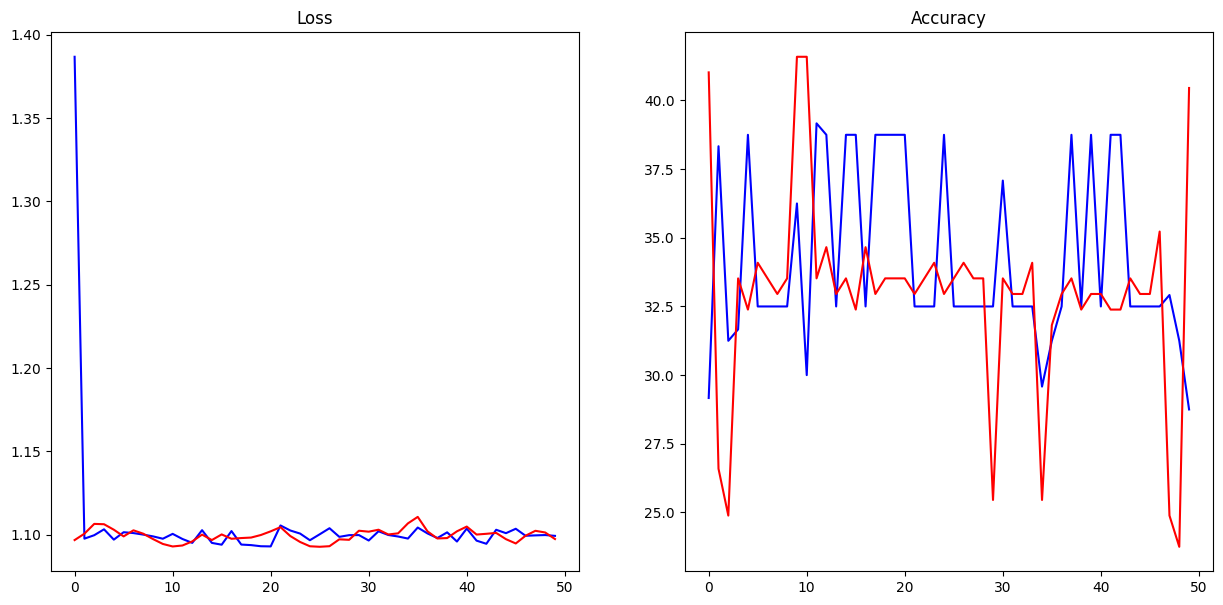

In [34]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.title("Loss")
plt.plot(range(50),train_loss_1,color="b")
plt.plot(range(50),test_loss_1,color="r")

plt.subplot(1,2,2)
plt.title("Accuracy")
plt.plot(range(50),train_acc_1,color="b")
plt.plot(range(50),test_acc_1,color="r")

In [35]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [36]:
type(test_data)

torchvision.datasets.folder.ImageFolder

In [37]:
images = []
labels = []

for img, label in test_data:
    images.append(img)
    labels.append(label)

# Convert the lists to tensors
images_tensor = torch.stack(images)
labels_tensor = torch.tensor(labels)

In [38]:
images_tensor.shape

torch.Size([75, 3, 64, 64])

In [39]:
with torch.inference_mode():
  model1.eval()
  Y_pred = model1(images_tensor)
  Y_pred = torch.argmax(Y_pred,dim=1)

In [40]:
class_names

['pizza', 'steak', 'sushi']

In [41]:
confusion_matrix(labels_tensor,Y_pred)

array([[ 0,  0, 25],
       [ 0,  0, 19],
       [ 0,  0, 31]])

In [42]:
print(classification_report(y_true=labels_tensor,y_pred=Y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        25
           1       0.00      0.00      0.00        19
           2       0.41      1.00      0.58        31

    accuracy                           0.41        75
   macro avg       0.14      0.33      0.19        75
weighted avg       0.17      0.41      0.24        75



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
